In [1]:
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
GOOGLE=False
DIRECTORY_GOOGLE = '/content/gdrive/My Drive/wolt/wolt/'
DIRECTORY = './'

if GOOGLE:
    DIRECTORY = DIRECTORY_GOOGLE
    from google.colab import drive
    drive.mount('/content/gdrive')

In [3]:
l = pd.read_csv(DIRECTORY+'locations.csv')
p = pd.read_csv(DIRECTORY+'pickup_times.csv')
p['date'] = pd.to_datetime(p['iso_8601_timestamp'])
p = p.drop(['iso_8601_timestamp'], axis=1)

In [0]:
l.head()

,location_id,longitude,latitude
0,1,24.941583,60.170870
1,2,24.934201,60.169802
2,3,24.938493,60.166408
3,4,24.940467,60.167048
4,5,24.938793,60.167518


In [0]:
p.head()

,location_id,pickup_time,date
0,2,20,2019-01-13 19:32:53+00:00
1,55,37,2019-01-13 18:12:20+00:00
2,73,33,2019-01-10 18:13:26+00:00
3,46,33,2019-01-13 19:34:42+00:00
4,59,21,2019-01-08 16:11:42+00:00


In [0]:
l.describe()

,location_id,longitude,latitude
count,85.000000,85.000000,85.000000
mean,43.000000,24.936795,60.171424
std,24.681302,0.016679,0.010008
min,1.000000,24.876823,60.156714
25%,22.000000,24.931755,60.163782
50%,43.000000,24.938064,60.169055
75%,64.000000,24.946260,60.178490
max,85.000000,24.966130,60.199312


In [0]:
p.describe()

,location_id,pickup_time
count,65380.000000,65380.000000
mean,41.056470,22.666886
std,24.739899,9.586789
min,1.000000,4.000000
25%,19.000000,15.000000
50%,39.000000,22.000000
75%,63.000000,29.000000
max,85.000000,65.000000


# NN

In [4]:
def prepare_date_for_nn(df_date):
    weekdays_one_hot_df = pd.get_dummies(df_date.map(lambda x: x.dayofweek))
    time_flat_series = df_date.map(lambda a: (a.hour-10)/10 + a.minute/600)
    weekdays_one_hot_df['time'] = time_flat_series
    return weekdays_one_hot_df
  
def prepare_for_nn(df):
    dates = prepare_date_for_nn(df['date'])
    places_dummies = pd.get_dummies(df['location_id'])
    return pd.concat([dates, places_dummies], axis=1).values, (df['pickup_time']/90).values

In [5]:
X, y = prepare_for_nn(p)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
def make_nn_model1():
    model = Sequential()
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model2():
    model = Sequential()
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model3():
    model = Sequential()
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(300, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model
  
def make_nn_model4():
    model = Sequential()
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(300, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model5():
    model = Sequential()
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model6():
    model = Sequential()
    model.add(Dense(140, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(140, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model7():
    model = Sequential()
    model.add(Dense(200, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model8():
    model = Sequential()
    model.add(Dense(130, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(130, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(130, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(150, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(130, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(130, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model9():
    model = Sequential()
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(124, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model10():
    model = Sequential()
    model.add(Dense(124, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(124, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model11():
    model = Sequential()
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(2048, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(124, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model12():
    model = Sequential()
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(124, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

In [57]:
def make_and_validate(maker, X, y,):
    model = maker()
    val1 = 500
    val2 = 502
    X_test = X[val1:val2]
    history = []
    preds = []

    for i in [10, 40, 100, 150]:
        history.append( model.fit(
            X, y,
            epochs=i, validation_split = 0.2, batch_size=128, verbose=1))
    preds.append(model.predict(X_test)*90)
    return model, history, preds 

In [9]:
m1, h1, p1 = make_and_validate(make_nn_model1, X, y)
m2, h2, p2 = make_and_validate(make_nn_model2, X, y)
m3, h3, p3 = make_and_validate(make_nn_model3, X, y)
m4, h4, p4 = make_and_validate(make_nn_model4, X, y)

# print("\n \
# Should be: {} \n\
# Result1:  {} \n\
# Result2:  {} \n\
# Result3:  {} \n\
# Result4:  {} \n\
# Result5:  {} \n\
# Result6:  {} \n\
# Result7:  {} \n\
# Result8:  {} \n\
# Result9:  {} \n\
# Result10: {} \n\
# Result11: {} \n\
# Result12: {} \n\
# ".format(y[val1:val2],preds1,preds2,preds3,preds4,preds5,preds6,preds7,preds8,preds9,preds10,preds11,preds12), file=open(DIRECTORY+"output.txt", "a"))

Train on 52304 samples, validate on 13076 samples
Epoch 1/10
52304/52304 [==============================] - 2s 44us/step - loss: 0.0108 - mean_squared_error: 0.0108 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 44.3814 - cosine_proximity: -1.0000 - val_loss: 0.0095 - val_mean_squared_error: 0.0095 - val_mean_absolute_error: 0.0805 - val_mean_absolute_percentage_error: 45.5318 - val_cosine_proximity: -1.0000
Epoch 2/10
52304/52304 [==============================] - 2s 36us/step - loss: 0.0097 - mean_squared_error: 0.0097 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 42.5462 - cosine_proximity: -1.0000 - val_loss: 0.0092 - val_mean_squared_error: 0.0092 - val_mean_absolute_error: 0.0787 - val_mean_absolute_percentage_error: 43.6053 - val_cosine_proximity: -1.0000
Epoch 3/10
52304/52304 [==============================] - 2s 36us/step - loss: 0.0094 - mean_squared_error: 0.0094 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 41.8918 - cos

Epoch 34/40
52304/52304 [==============================] - 2s 36us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.8594 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 37.4224 - val_cosine_proximity: -1.0000
Epoch 35/40
52304/52304 [==============================] - 2s 36us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.9102 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0704 - val_mean_absolute_percentage_error: 34.1785 - val_cosine_proximity: -1.0000
Epoch 36/40
52304/52304 [==============================] - 2s 36us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.8336 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val

52304/52304 [==============================] - 2s 36us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 36.0961 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0704 - val_mean_absolute_percentage_error: 33.7853 - val_cosine_proximity: -1.0000
Epoch 37/100
52304/52304 [==============================] - 2s 36us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 35.9602 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0696 - val_mean_absolute_percentage_error: 34.7570 - val_cosine_proximity: -1.0000
Epoch 38/100
52304/52304 [==============================] - 2s 36us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 35.9376 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 36us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.5454 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 35.5923 - val_cosine_proximity: -1.0000
Epoch 79/100
52304/52304 [==============================] - 2s 36us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.5058 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 34.1879 - val_cosine_proximity: -1.0000
Epoch 80/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.5530 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 36us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.2940 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0687 - val_mean_absolute_percentage_error: 33.7759 - val_cosine_proximity: -1.0000
Epoch 21/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.2843 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 34.8554 - val_cosine_proximity: -1.0000
Epoch 22/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.2350 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 34.9312 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0686 - val_mean_absolute_percentage_error: 33.8610 - val_cosine_proximity: -1.0000
Epoch 63/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 35.0848 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 35.8519 - val_cosine_proximity: -1.0000
Epoch 64/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 35.0115 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 36us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 34.8520 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 35.7104 - val_cosine_proximity: -1.0000
Epoch 105/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.9000 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 35.8444 - val_cosine_proximity: -1.0000
Epoch 106/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.8878 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_sq

52304/52304 [==============================] - 2s 36us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 34.7844 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0682 - val_mean_absolute_percentage_error: 33.6307 - val_cosine_proximity: -1.0000
Epoch 147/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 34.7405 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 36.5058 - val_cosine_proximity: -1.0000
Epoch 148/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.8333 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_sq

Epoch 29/40
52304/52304 [==============================] - 2s 36us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 37.8000 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0723 - val_mean_absolute_percentage_error: 39.1998 - val_cosine_proximity: -1.0000
Epoch 30/40
52304/52304 [==============================] - 2s 36us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 37.6842 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0719 - val_mean_absolute_percentage_error: 38.0913 - val_cosine_proximity: -1.0000
Epoch 31/40
52304/52304 [==============================] - 2s 36us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 37.6803 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val

52304/52304 [==============================] - 2s 37us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 37.3478 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0707 - val_mean_absolute_percentage_error: 34.8383 - val_cosine_proximity: -1.0000
Epoch 32/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 37.3137 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0708 - val_mean_absolute_percentage_error: 35.9137 - val_cosine_proximity: -1.0000
Epoch 33/100
52304/52304 [==============================] - 2s 36us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 37.2215 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squa

52304/52304 [==============================] - 2s 36us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 36.9476 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 37.4292 - val_cosine_proximity: -1.0000
Epoch 74/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 37.0155 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0710 - val_mean_absolute_percentage_error: 36.6514 - val_cosine_proximity: -1.0000
Epoch 75/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.0762 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squa

52304/52304 [==============================] - 2s 36us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 36.8484 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 35.9494 - val_cosine_proximity: -1.0000
Epoch 16/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 36.9094 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 35.9358 - val_cosine_proximity: -1.0000
Epoch 17/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.7866 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 36.8031 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0705 - val_mean_absolute_percentage_error: 35.5203 - val_cosine_proximity: -1.0000
Epoch 58/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.7465 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 36.3825 - val_cosine_proximity: -1.0000
Epoch 59/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.6996 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squa

52304/52304 [==============================] - 2s 36us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.6017 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 34.8097 - val_cosine_proximity: -1.0000
Epoch 100/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.6956 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 34.6604 - val_cosine_proximity: -1.0000
Epoch 101/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.6870 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_sq

52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.6633 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0713 - val_mean_absolute_percentage_error: 37.9089 - val_cosine_proximity: -1.0000
Epoch 142/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.5329 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0708 - val_mean_absolute_percentage_error: 33.8031 - val_cosine_proximity: -1.0000
Epoch 143/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.6142 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_sq

Epoch 24/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 37.9940 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0713 - val_mean_absolute_percentage_error: 35.9781 - val_cosine_proximity: -1.0000
Epoch 25/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 38.0489 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0725 - val_mean_absolute_percentage_error: 38.5499 - val_cosine_proximity: -1.0000
Epoch 26/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 37.9840 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val

52304/52304 [==============================] - 2s 41us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.6010 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 34.8611 - val_cosine_proximity: -1.0000
Epoch 27/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.5778 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0708 - val_mean_absolute_percentage_error: 36.4615 - val_cosine_proximity: -1.0000
Epoch 28/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.4746 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.4966 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0714 - val_mean_absolute_percentage_error: 38.0676 - val_cosine_proximity: -1.0000
Epoch 69/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.4130 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 33.9766 - val_cosine_proximity: -1.0000
Epoch 70/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 37.3106 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 37.2369 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0713 - val_mean_absolute_percentage_error: 37.7511 - val_cosine_proximity: -1.0000
Epoch 11/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 37.1736 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 34.7630 - val_cosine_proximity: -1.0000
Epoch 12/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 37.2551 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.1044 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0703 - val_mean_absolute_percentage_error: 35.8201 - val_cosine_proximity: -1.0000
Epoch 53/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.0695 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0710 - val_mean_absolute_percentage_error: 33.4753 - val_cosine_proximity: -1.0000
Epoch 54/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.0892 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 37.1270 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 35.6994 - val_cosine_proximity: -1.0000
Epoch 95/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 36.9563 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 35.5077 - val_cosine_proximity: -1.0000
Epoch 96/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 36.9688 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 42us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 36.9357 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0706 - val_mean_absolute_percentage_error: 37.2489 - val_cosine_proximity: -1.0000
Epoch 137/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.8373 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0703 - val_mean_absolute_percentage_error: 36.7973 - val_cosine_proximity: -1.0000
Epoch 138/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.9056 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_sq

52304/52304 [==============================] - 2s 42us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.2902 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0707 - val_mean_absolute_percentage_error: 35.5102 - val_cosine_proximity: -1.0000
Epoch 19/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 37.3201 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 35.9967 - val_cosine_proximity: -1.0000
Epoch 20/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 37.2543 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_square

Epoch 40/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.7310 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0709 - val_mean_absolute_percentage_error: 33.6311 - val_cosine_proximity: -1.0000
Train on 52304 samples, validate on 13076 samples
Epoch 1/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.6689 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0706 - val_mean_absolute_percentage_error: 37.0795 - val_cosine_proximity: -1.0000
Epoch 2/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 36.5931 - 

52304/52304 [==============================] - 2s 41us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 35.9365 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0713 - val_mean_absolute_percentage_error: 38.2651 - val_cosine_proximity: -1.0000
Epoch 43/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 35.8564 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 34.3810 - val_cosine_proximity: -1.0000
Epoch 44/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 35.8524 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.5828 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 33.7621 - val_cosine_proximity: -1.0000
Epoch 85/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 35.4537 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0690 - val_mean_absolute_percentage_error: 34.2847 - val_cosine_proximity: -1.0000
Epoch 86/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4540 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 35.1645 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 35.2079 - val_cosine_proximity: -1.0000
Epoch 27/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 35.1069 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0686 - val_mean_absolute_percentage_error: 34.1594 - val_cosine_proximity: -1.0000
Epoch 28/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.1785 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squa

52304/52304 [==============================] - 2s 42us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 34.9964 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 34.9802 - val_cosine_proximity: -1.0000
Epoch 69/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 35.1420 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0683 - val_mean_absolute_percentage_error: 34.3599 - val_cosine_proximity: -1.0000
Epoch 70/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 34.9925 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.8622 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 36.0459 - val_cosine_proximity: -1.0000
Epoch 111/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 34.7924 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 36.1361 - val_cosine_proximity: -1.0000
Epoch 112/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 34.7681 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_sq

In [58]:
m5, h5, p5 = make_and_validate(make_nn_model5, X, y)
m6, h6, p6 = make_and_validate(make_nn_model6, X, y)
m7, h7, p7 = make_and_validate(make_nn_model7, X, y)
m8, h8, p8 = make_and_validate(make_nn_model8, X, y)

Train on 52304 samples, validate on 13076 samples
Epoch 1/10
52304/52304 [==============================] - 2s 46us/step - loss: 0.0109 - mean_squared_error: 0.0109 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 44.7474 - cosine_proximity: -1.0000 - val_loss: 0.0094 - val_mean_squared_error: 0.0094 - val_mean_absolute_error: 0.0784 - val_mean_absolute_percentage_error: 39.2321 - val_cosine_proximity: -1.0000
Epoch 2/10
52304/52304 [==============================] - 2s 33us/step - loss: 0.0097 - mean_squared_error: 0.0097 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 42.4996 - cosine_proximity: -1.0000 - val_loss: 0.0092 - val_mean_squared_error: 0.0092 - val_mean_absolute_error: 0.0774 - val_mean_absolute_percentage_error: 38.8557 - val_cosine_proximity: -1.0000
Epoch 3/10
52304/52304 [==============================] - 2s 34us/step - loss: 0.0094 - mean_squared_error: 0.0094 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 41.9534 - cos

Epoch 34/40
52304/52304 [==============================] - 2s 33us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 38.3141 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0719 - val_mean_absolute_percentage_error: 36.4747 - val_cosine_proximity: -1.0000
Epoch 35/40
52304/52304 [==============================] - 2s 33us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.1833 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0728 - val_mean_absolute_percentage_error: 37.9730 - val_cosine_proximity: -1.0000
Epoch 36/40
52304/52304 [==============================] - 2s 33us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.1377 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val

52304/52304 [==============================] - 2s 33us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.8466 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0707 - val_mean_absolute_percentage_error: 37.0244 - val_cosine_proximity: -1.0000
Epoch 37/100
52304/52304 [==============================] - 2s 32us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.8759 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0704 - val_mean_absolute_percentage_error: 35.6255 - val_cosine_proximity: -1.0000
Epoch 38/100
52304/52304 [==============================] - 2s 33us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.8634 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 33us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 36.2896 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0698 - val_mean_absolute_percentage_error: 36.0025 - val_cosine_proximity: -1.0000
Epoch 79/100
52304/52304 [==============================] - 2s 33us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 36.2473 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 35.5815 - val_cosine_proximity: -1.0000
Epoch 80/100
52304/52304 [==============================] - 2s 33us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 36.2638 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squa

52304/52304 [==============================] - 2s 33us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 35.9618 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 35.9263 - val_cosine_proximity: -1.0000
Epoch 21/150
52304/52304 [==============================] - 2s 33us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 35.8680 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0698 - val_mean_absolute_percentage_error: 34.8580 - val_cosine_proximity: -1.0000
Epoch 22/150
52304/52304 [==============================] - 2s 33us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 35.9524 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 33us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.5780 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0704 - val_mean_absolute_percentage_error: 36.9470 - val_cosine_proximity: -1.0000
Epoch 63/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.6597 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0706 - val_mean_absolute_percentage_error: 37.0674 - val_cosine_proximity: -1.0000
Epoch 64/150
52304/52304 [==============================] - 2s 33us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.5357 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 33us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4975 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 34.9360 - val_cosine_proximity: -1.0000
Epoch 105/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.5027 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0709 - val_mean_absolute_percentage_error: 37.6777 - val_cosine_proximity: -1.0000
Epoch 106/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4636 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_sq

52304/52304 [==============================] - 2s 33us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.3285 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 34.4172 - val_cosine_proximity: -1.0000
Epoch 147/150
52304/52304 [==============================] - 2s 33us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.2785 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0708 - val_mean_absolute_percentage_error: 37.9027 - val_cosine_proximity: -1.0000
Epoch 148/150
52304/52304 [==============================] - 2s 33us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.3426 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_sq

Epoch 29/40
52304/52304 [==============================] - 2s 29us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 39.1701 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0738 - val_mean_absolute_percentage_error: 38.7135 - val_cosine_proximity: -1.0000
Epoch 30/40
52304/52304 [==============================] - 2s 29us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 39.1164 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0746 - val_mean_absolute_percentage_error: 40.0906 - val_cosine_proximity: -1.0000
Epoch 31/40
52304/52304 [==============================] - 2s 29us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 39.1761 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val

52304/52304 [==============================] - 2s 29us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 38.7408 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0731 - val_mean_absolute_percentage_error: 38.2576 - val_cosine_proximity: -1.0000
Epoch 32/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 38.6902 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0729 - val_mean_absolute_percentage_error: 36.2367 - val_cosine_proximity: -1.0000
Epoch 33/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 38.7368 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 38.4965 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0730 - val_mean_absolute_percentage_error: 37.3743 - val_cosine_proximity: -1.0000
Epoch 74/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 38.4105 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0729 - val_mean_absolute_percentage_error: 38.5156 - val_cosine_proximity: -1.0000
Epoch 75/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 38.3270 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.2531 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0723 - val_mean_absolute_percentage_error: 36.8053 - val_cosine_proximity: -1.0000
Epoch 16/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.2511 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0728 - val_mean_absolute_percentage_error: 38.5609 - val_cosine_proximity: -1.0000
Epoch 17/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 38.2652 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.2340 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0734 - val_mean_absolute_percentage_error: 38.1659 - val_cosine_proximity: -1.0000
Epoch 58/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.1418 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0724 - val_mean_absolute_percentage_error: 37.7938 - val_cosine_proximity: -1.0000
Epoch 59/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 38.1290 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 38.0689 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0725 - val_mean_absolute_percentage_error: 36.8125 - val_cosine_proximity: -1.0000
Epoch 100/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 38.0223 - cosine_proximity: -1.0000 - val_loss: 0.0084 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0752 - val_mean_absolute_percentage_error: 39.8871 - val_cosine_proximity: -1.0000
Epoch 101/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 38.0708 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_sq

52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 38.0169 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0722 - val_mean_absolute_percentage_error: 37.3837 - val_cosine_proximity: -1.0000
Epoch 142/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.9366 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0725 - val_mean_absolute_percentage_error: 38.4180 - val_cosine_proximity: -1.0000
Epoch 143/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.9553 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_sq

Epoch 24/40
52304/52304 [==============================] - 2s 29us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 39.1273 - cosine_proximity: -1.0000 - val_loss: 0.0084 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0749 - val_mean_absolute_percentage_error: 39.4434 - val_cosine_proximity: -1.0000
Epoch 25/40
52304/52304 [==============================] - 1s 29us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 39.1451 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0740 - val_mean_absolute_percentage_error: 38.3404 - val_cosine_proximity: -1.0000
Epoch 26/40
52304/52304 [==============================] - 2s 29us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 39.0860 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val

52304/52304 [==============================] - 2s 29us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 38.5792 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0738 - val_mean_absolute_percentage_error: 39.4234 - val_cosine_proximity: -1.0000
Epoch 27/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 38.5695 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0737 - val_mean_absolute_percentage_error: 37.5189 - val_cosine_proximity: -1.0000
Epoch 28/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 38.5111 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 38.3583 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0734 - val_mean_absolute_percentage_error: 38.6108 - val_cosine_proximity: -1.0000
Epoch 69/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 38.2736 - cosine_proximity: -1.0000 - val_loss: 0.0084 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0740 - val_mean_absolute_percentage_error: 39.0902 - val_cosine_proximity: -1.0000
Epoch 70/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 38.2875 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.1530 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0723 - val_mean_absolute_percentage_error: 37.5401 - val_cosine_proximity: -1.0000
Epoch 11/150
52304/52304 [==============================] - 2s 30us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 38.0695 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0728 - val_mean_absolute_percentage_error: 37.3000 - val_cosine_proximity: -1.0000
Epoch 12/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 38.0681 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 38.0599 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0730 - val_mean_absolute_percentage_error: 36.7611 - val_cosine_proximity: -1.0000
Epoch 53/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.1381 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0725 - val_mean_absolute_percentage_error: 37.5474 - val_cosine_proximity: -1.0000
Epoch 54/150
52304/52304 [==============================] - 2s 30us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 38.0602 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.9132 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0727 - val_mean_absolute_percentage_error: 38.5328 - val_cosine_proximity: -1.0000
Epoch 95/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 38.0312 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0734 - val_mean_absolute_percentage_error: 36.8761 - val_cosine_proximity: -1.0000
Epoch 96/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.9740 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.8983 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0722 - val_mean_absolute_percentage_error: 37.7990 - val_cosine_proximity: -1.0000
Epoch 137/150
52304/52304 [==============================] - 2s 30us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.8155 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0736 - val_mean_absolute_percentage_error: 37.6636 - val_cosine_proximity: -1.0000
Epoch 138/150
52304/52304 [==============================] - 2s 30us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.9219 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_sq

52304/52304 [==============================] - 2s 47us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.8245 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0716 - val_mean_absolute_percentage_error: 37.2259 - val_cosine_proximity: -1.0000
Epoch 19/40
52304/52304 [==============================] - 2s 47us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.7766 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0716 - val_mean_absolute_percentage_error: 36.5366 - val_cosine_proximity: -1.0000
Epoch 20/40
52304/52304 [==============================] - 2s 47us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.6346 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_square

Epoch 40/40
52304/52304 [==============================] - 2s 46us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.8701 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0709 - val_mean_absolute_percentage_error: 37.0451 - val_cosine_proximity: -1.0000
Train on 52304 samples, validate on 13076 samples
Epoch 1/100
52304/52304 [==============================] - 2s 47us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.8455 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0707 - val_mean_absolute_percentage_error: 35.5707 - val_cosine_proximity: -1.0000
Epoch 2/100
52304/52304 [==============================] - 2s 46us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.8630 - 

52304/52304 [==============================] - 2s 46us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 36.2625 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0703 - val_mean_absolute_percentage_error: 35.9940 - val_cosine_proximity: -1.0000
Epoch 43/100
52304/52304 [==============================] - 2s 46us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 36.2059 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0705 - val_mean_absolute_percentage_error: 37.0912 - val_cosine_proximity: -1.0000
Epoch 44/100
52304/52304 [==============================] - 2s 46us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 36.1801 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squa

52304/52304 [==============================] - 2s 45us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 35.8490 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 36.3193 - val_cosine_proximity: -1.0000
Epoch 85/100
52304/52304 [==============================] - 2s 46us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 36.0010 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 34.1328 - val_cosine_proximity: -1.0000
Epoch 86/100
52304/52304 [==============================] - 2s 46us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 35.8439 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 46us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 35.7495 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 35.8836 - val_cosine_proximity: -1.0000
Epoch 27/150
52304/52304 [==============================] - 2s 47us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.5761 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 35.5831 - val_cosine_proximity: -1.0000
Epoch 28/150
52304/52304 [==============================] - 2s 46us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.5325 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 46us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.3340 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 34.4734 - val_cosine_proximity: -1.0000
Epoch 69/150
52304/52304 [==============================] - 2s 47us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.3622 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 35.0330 - val_cosine_proximity: -1.0000
Epoch 70/150
52304/52304 [==============================] - 2s 47us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.3161 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 46us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.2539 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0686 - val_mean_absolute_percentage_error: 34.2072 - val_cosine_proximity: -1.0000
Epoch 111/150
52304/52304 [==============================] - 2s 46us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.2594 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0686 - val_mean_absolute_percentage_error: 33.4898 - val_cosine_proximity: -1.0000
Epoch 112/150
52304/52304 [==============================] - 2s 45us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 35.1141 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_sq

In [62]:
m9, h9, p9 = make_and_validate(make_nn_model9, X, y)
m10, h10, p10 = make_and_validate(make_nn_model10, X, y)
m11, h11, p11 = make_and_validate(make_nn_model11, X, y)
m12, h12, p12 = make_and_validate(make_nn_model12, X, y)

Train on 52304 samples, validate on 13076 samples
Epoch 1/10
52304/52304 [==============================] - 3s 59us/step - loss: 0.0108 - mean_squared_error: 0.0108 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 43.9824 - cosine_proximity: -1.0000 - val_loss: 0.0091 - val_mean_squared_error: 0.0091 - val_mean_absolute_error: 0.0776 - val_mean_absolute_percentage_error: 40.9020 - val_cosine_proximity: -1.0000
Epoch 2/10
52304/52304 [==============================] - 2s 39us/step - loss: 0.0094 - mean_squared_error: 0.0094 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 41.7390 - cosine_proximity: -1.0000 - val_loss: 0.0089 - val_mean_squared_error: 0.0089 - val_mean_absolute_error: 0.0774 - val_mean_absolute_percentage_error: 42.3687 - val_cosine_proximity: -1.0000
Epoch 3/10
52304/52304 [==============================] - 2s 40us/step - loss: 0.0092 - mean_squared_error: 0.0092 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 41.0488 - cos

Epoch 34/40
52304/52304 [==============================] - 2s 38us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 36.3208 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0709 - val_mean_absolute_percentage_error: 34.2672 - val_cosine_proximity: -1.0000
Epoch 35/40
52304/52304 [==============================] - 2s 38us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 36.2560 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0704 - val_mean_absolute_percentage_error: 35.6176 - val_cosine_proximity: -1.0000
Epoch 36/40
52304/52304 [==============================] - 2s 38us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 36.2097 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val

52304/52304 [==============================] - 2s 39us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.2274 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0703 - val_mean_absolute_percentage_error: 37.5570 - val_cosine_proximity: -1.0000
Epoch 37/100
52304/52304 [==============================] - 2s 39us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4323 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0697 - val_mean_absolute_percentage_error: 36.0437 - val_cosine_proximity: -1.0000
Epoch 38/100
52304/52304 [==============================] - 2s 38us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 35.3544 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 39us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 34.9039 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 35.2288 - val_cosine_proximity: -1.0000
Epoch 79/100
52304/52304 [==============================] - 2s 39us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 34.7533 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 36.4640 - val_cosine_proximity: -1.0000
Epoch 80/100
52304/52304 [==============================] - 2s 38us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 34.8463 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 39us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 34.5177 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 37.6129 - val_cosine_proximity: -1.0000
Epoch 21/150
52304/52304 [==============================] - 2s 38us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 34.6797 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 32.9185 - val_cosine_proximity: -1.0000
Epoch 22/150
52304/52304 [==============================] - 2s 39us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 34.5986 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squa

52304/52304 [==============================] - 2s 39us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 34.3576 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 34.5625 - val_cosine_proximity: -1.0000
Epoch 63/150
52304/52304 [==============================] - 2s 38us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 34.3263 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0686 - val_mean_absolute_percentage_error: 35.5457 - val_cosine_proximity: -1.0000
Epoch 64/150
52304/52304 [==============================] - 2s 38us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 34.3435 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 39us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 34.2086 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 36.0817 - val_cosine_proximity: -1.0000
Epoch 105/150
52304/52304 [==============================] - 2s 38us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 34.2523 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0688 - val_mean_absolute_percentage_error: 33.4048 - val_cosine_proximity: -1.0000
Epoch 106/150
52304/52304 [==============================] - 2s 38us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 34.1466 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_sq

52304/52304 [==============================] - 2s 39us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 34.0527 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 35.0639 - val_cosine_proximity: -1.0000
Epoch 147/150
52304/52304 [==============================] - 2s 39us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 34.1501 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 34.1264 - val_cosine_proximity: -1.0000
Epoch 148/150
52304/52304 [==============================] - 2s 38us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 34.0824 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_sq

Epoch 29/40
52304/52304 [==============================] - 2s 43us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 36.9331 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0703 - val_mean_absolute_percentage_error: 35.2954 - val_cosine_proximity: -1.0000
Epoch 30/40
52304/52304 [==============================] - 2s 43us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.7737 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0711 - val_mean_absolute_percentage_error: 37.3944 - val_cosine_proximity: -1.0000
Epoch 31/40
52304/52304 [==============================] - 2s 43us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.7604 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val

52304/52304 [==============================] - 2s 43us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 35.8924 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0703 - val_mean_absolute_percentage_error: 36.6052 - val_cosine_proximity: -1.0000
Epoch 32/100
52304/52304 [==============================] - 2s 43us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 35.8230 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 34.3876 - val_cosine_proximity: -1.0000
Epoch 33/100
52304/52304 [==============================] - 2s 43us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 35.9731 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 43us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.2381 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 34.3935 - val_cosine_proximity: -1.0000
Epoch 74/100
52304/52304 [==============================] - 2s 43us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 35.3831 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0690 - val_mean_absolute_percentage_error: 34.6010 - val_cosine_proximity: -1.0000
Epoch 75/100
52304/52304 [==============================] - 2s 43us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.3289 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 43us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 35.0148 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0697 - val_mean_absolute_percentage_error: 36.5887 - val_cosine_proximity: -1.0000
Epoch 16/150
52304/52304 [==============================] - 2s 43us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 35.0958 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0687 - val_mean_absolute_percentage_error: 35.1624 - val_cosine_proximity: -1.0000
Epoch 17/150
52304/52304 [==============================] - 2s 43us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 35.0439 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 44us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 34.9403 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 36.1745 - val_cosine_proximity: -1.0000
Epoch 58/150
52304/52304 [==============================] - 2s 43us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.8867 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 35.8701 - val_cosine_proximity: -1.0000
Epoch 59/150
52304/52304 [==============================] - 2s 43us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 34.8546 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 43us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 34.6605 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 36.1217 - val_cosine_proximity: -1.0000
Epoch 100/150
52304/52304 [==============================] - 2s 43us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 34.7575 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 36.4763 - val_cosine_proximity: -1.0000
Epoch 101/150
52304/52304 [==============================] - 2s 44us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 34.6453 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_sq

52304/52304 [==============================] - 2s 43us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 34.6163 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0683 - val_mean_absolute_percentage_error: 32.9055 - val_cosine_proximity: -1.0000
Epoch 142/150
52304/52304 [==============================] - 2s 43us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 34.5872 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0683 - val_mean_absolute_percentage_error: 34.6576 - val_cosine_proximity: -1.0000
Epoch 143/150
52304/52304 [==============================] - 2s 44us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 34.5925 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_sq

Epoch 24/40
52304/52304 [==============================] - 4s 82us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 38.1091 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0713 - val_mean_absolute_percentage_error: 36.7676 - val_cosine_proximity: -1.0000
Epoch 25/40
52304/52304 [==============================] - 4s 82us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 37.9736 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0722 - val_mean_absolute_percentage_error: 38.8065 - val_cosine_proximity: -1.0000
Epoch 26/40
52304/52304 [==============================] - 4s 82us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 37.9380 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val

52304/52304 [==============================] - 4s 83us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.5405 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0717 - val_mean_absolute_percentage_error: 35.7866 - val_cosine_proximity: -1.0000
Epoch 27/100
52304/52304 [==============================] - 4s 84us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.6721 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0707 - val_mean_absolute_percentage_error: 34.8210 - val_cosine_proximity: -1.0000
Epoch 28/100
52304/52304 [==============================] - 4s 83us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 37.4506 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squa

52304/52304 [==============================] - 4s 84us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 37.0831 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0715 - val_mean_absolute_percentage_error: 38.0839 - val_cosine_proximity: -1.0000
Epoch 69/100
52304/52304 [==============================] - 4s 83us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 37.0498 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0707 - val_mean_absolute_percentage_error: 36.7695 - val_cosine_proximity: -1.0000
Epoch 70/100
52304/52304 [==============================] - 4s 84us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 37.3344 - cosine_proximity: -0.9999 - val_loss: 0.0077 - val_mean_squa

52304/52304 [==============================] - 4s 83us/step - loss: 0.0095 - mean_squared_error: 0.0095 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 42.0095 - cosine_proximity: -0.9999 - val_loss: 0.0091 - val_mean_squared_error: 0.0091 - val_mean_absolute_error: 0.0783 - val_mean_absolute_percentage_error: 42.4348 - val_cosine_proximity: -1.0000
Epoch 11/150
52304/52304 [==============================] - 4s 83us/step - loss: 0.0094 - mean_squared_error: 0.0094 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 41.8155 - cosine_proximity: -1.0000 - val_loss: 0.0090 - val_mean_squared_error: 0.0090 - val_mean_absolute_error: 0.0774 - val_mean_absolute_percentage_error: 40.0975 - val_cosine_proximity: -1.0000
Epoch 12/150
52304/52304 [==============================] - 4s 83us/step - loss: 0.0096 - mean_squared_error: 0.0096 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 41.8021 - cosine_proximity: -1.0000 - val_loss: 0.0092 - val_mean_squa

52304/52304 [==============================] - 4s 82us/step - loss: 0.0102 - mean_squared_error: 0.0102 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 43.0010 - cosine_proximity: -0.9898 - val_loss: 0.0092 - val_mean_squared_error: 0.0092 - val_mean_absolute_error: 0.0793 - val_mean_absolute_percentage_error: 44.1785 - val_cosine_proximity: -1.0000
Epoch 53/150
52304/52304 [==============================] - 4s 83us/step - loss: 0.0096 - mean_squared_error: 0.0096 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 42.4011 - cosine_proximity: -0.9997 - val_loss: 0.0091 - val_mean_squared_error: 0.0091 - val_mean_absolute_error: 0.0788 - val_mean_absolute_percentage_error: 43.2244 - val_cosine_proximity: -1.0000
Epoch 54/150
52304/52304 [==============================] - 4s 83us/step - loss: 0.0096 - mean_squared_error: 0.0096 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 42.5813 - cosine_proximity: -0.9999 - val_loss: 0.0090 - val_mean_squa

52304/52304 [==============================] - 4s 82us/step - loss: 0.0105 - mean_squared_error: 0.0105 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 44.2100 - cosine_proximity: -0.9937 - val_loss: 0.0094 - val_mean_squared_error: 0.0094 - val_mean_absolute_error: 0.0798 - val_mean_absolute_percentage_error: 43.1989 - val_cosine_proximity: -0.9995
Epoch 95/150
52304/52304 [==============================] - 4s 83us/step - loss: 0.0101 - mean_squared_error: 0.0101 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 43.6258 - cosine_proximity: -0.9993 - val_loss: 0.0096 - val_mean_squared_error: 0.0096 - val_mean_absolute_error: 0.0798 - val_mean_absolute_percentage_error: 41.1367 - val_cosine_proximity: -1.0000
Epoch 96/150
52304/52304 [==============================] - 4s 82us/step - loss: 0.0100 - mean_squared_error: 0.0100 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 43.5958 - cosine_proximity: -0.9988 - val_loss: 0.0098 - val_mean_squa

52304/52304 [==============================] - 4s 83us/step - loss: 0.0097 - mean_squared_error: 0.0097 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 42.2145 - cosine_proximity: -0.9943 - val_loss: 0.0094 - val_mean_squared_error: 0.0094 - val_mean_absolute_error: 0.0805 - val_mean_absolute_percentage_error: 46.5036 - val_cosine_proximity: -0.9998
Epoch 137/150
52304/52304 [==============================] - 4s 83us/step - loss: 0.0096 - mean_squared_error: 0.0096 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 42.2948 - cosine_proximity: -0.9991 - val_loss: 0.0089 - val_mean_squared_error: 0.0089 - val_mean_absolute_error: 0.0778 - val_mean_absolute_percentage_error: 43.1279 - val_cosine_proximity: -0.9991
Epoch 138/150
52304/52304 [==============================] - 4s 83us/step - loss: 0.0096 - mean_squared_error: 0.0096 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 41.8974 - cosine_proximity: -0.9983 - val_loss: 0.0092 - val_mean_sq

52304/52304 [==============================] - 3s 52us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 37.3482 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0716 - val_mean_absolute_percentage_error: 34.3694 - val_cosine_proximity: -1.0000
Epoch 19/40
52304/52304 [==============================] - 3s 51us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 37.3224 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0716 - val_mean_absolute_percentage_error: 38.0587 - val_cosine_proximity: -1.0000
Epoch 20/40
52304/52304 [==============================] - 3s 52us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 37.2200 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_square

Epoch 40/40
52304/52304 [==============================] - 3s 52us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 36.5116 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0714 - val_mean_absolute_percentage_error: 38.3400 - val_cosine_proximity: -1.0000
Train on 52304 samples, validate on 13076 samples
Epoch 1/100
52304/52304 [==============================] - 3s 53us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 36.5529 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0704 - val_mean_absolute_percentage_error: 36.6468 - val_cosine_proximity: -1.0000
Epoch 2/100
52304/52304 [==============================] - 3s 52us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.5966 - 

52304/52304 [==============================] - 3s 53us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 35.7400 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0696 - val_mean_absolute_percentage_error: 35.3933 - val_cosine_proximity: -1.0000
Epoch 43/100
52304/52304 [==============================] - 3s 53us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 35.6873 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 34.8563 - val_cosine_proximity: -1.0000
Epoch 44/100
52304/52304 [==============================] - 3s 53us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 35.8323 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 3s 52us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 35.3901 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0700 - val_mean_absolute_percentage_error: 37.5916 - val_cosine_proximity: -1.0000
Epoch 85/100
52304/52304 [==============================] - 3s 52us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.5174 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 34.2429 - val_cosine_proximity: -1.0000
Epoch 86/100
52304/52304 [==============================] - 3s 53us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 35.7583 - cosine_proximity: -0.9998 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 3s 52us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 35.5452 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 34.3023 - val_cosine_proximity: -1.0000
Epoch 27/150
52304/52304 [==============================] - 3s 53us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.4688 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 34.1426 - val_cosine_proximity: -1.0000
Epoch 28/150
52304/52304 [==============================] - 3s 53us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.4648 - cosine_proximity: -0.9999 - val_loss: 0.0077 - val_mean_squa

52304/52304 [==============================] - 3s 53us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 35.0132 - cosine_proximity: -0.9999 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 37.4602 - val_cosine_proximity: -1.0000
Epoch 69/150
52304/52304 [==============================] - 3s 53us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.1779 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0723 - val_mean_absolute_percentage_error: 39.9089 - val_cosine_proximity: -1.0000
Epoch 70/150
52304/52304 [==============================] - 3s 53us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 35.2920 - cosine_proximity: -0.9999 - val_loss: 0.0072 - val_mean_squa

52304/52304 [==============================] - 3s 52us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 35.0371 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 35.5610 - val_cosine_proximity: -1.0000
Epoch 111/150
52304/52304 [==============================] - 3s 52us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 34.9944 - cosine_proximity: -0.9999 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 34.1353 - val_cosine_proximity: -1.0000
Epoch 112/150
52304/52304 [==============================] - 3s 53us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.9396 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_sq

In [53]:
def visualize_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def visualize_history_more(history):
    # Plot training & validation accuracy values
    mse=[]
    vmse=[]
    loss=[]
    vloss=[]
    for h in history:
        mse+= h.history['mean_absolute_error']
        vmse+= h.history['val_mean_absolute_error']
        loss+= h.history['loss']
        vloss+= h.history['val_loss']
    
    plt.plot(mse)
    plt.plot(vmse)
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(loss)
    plt.plot(vloss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
# pyplot.plot(history.history['mean_squared_error'])
# pyplot.plot(history.history['mean_absolute_error'])
# pyplot.plot(history.history['mean_absolute_percentage_error'])
# pyplot.plot(history.history['cosine_proximity'])

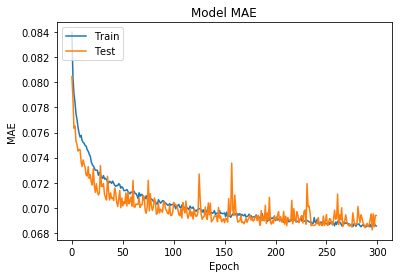

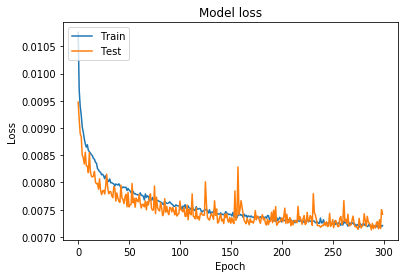

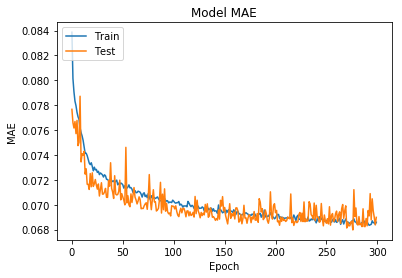

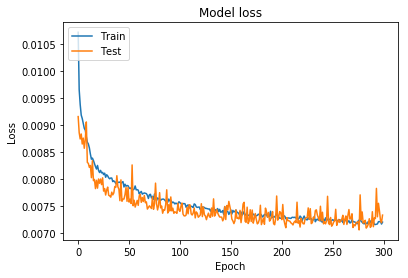

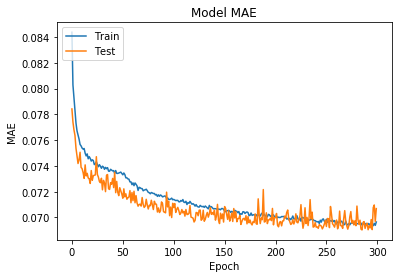

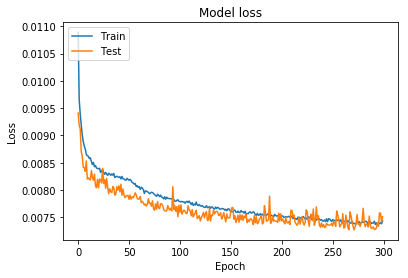

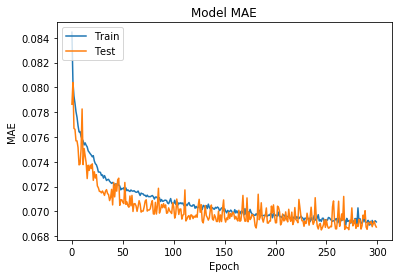

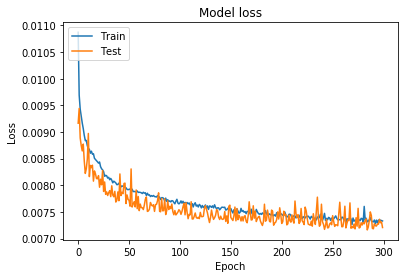

In [60]:
visualize_history_more(h1)
visualize_history_more(h4)
visualize_history_more(h5)
# visualize_history_more(h6)
# visualize_history_more(h7)
visualize_history_more(h8)

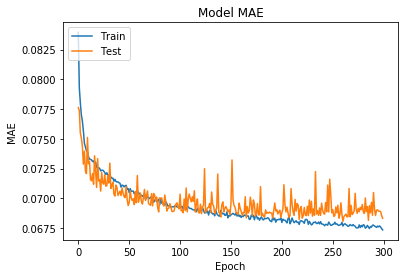

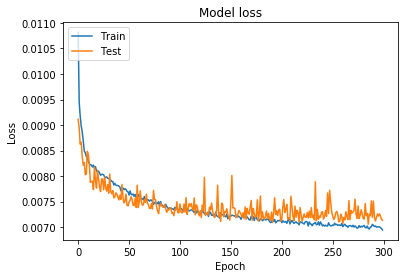

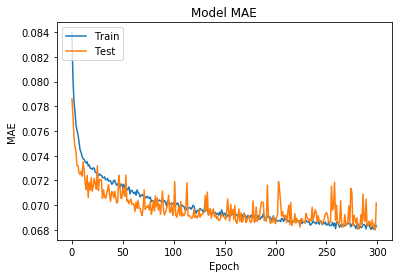

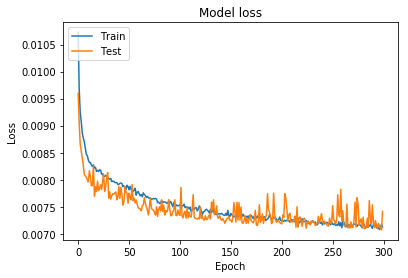

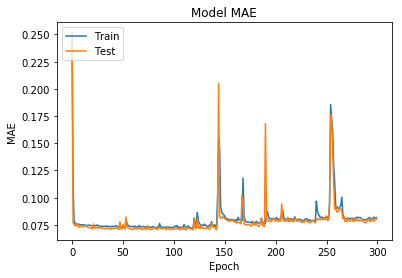

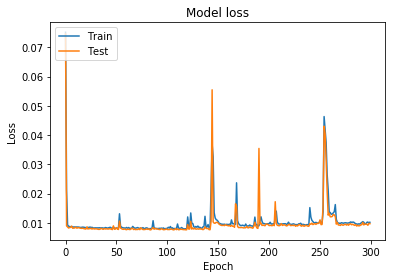

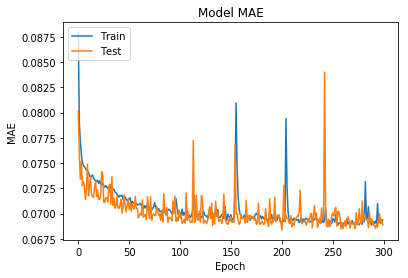

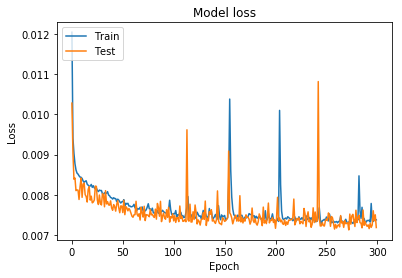

In [63]:
visualize_history_more(h9)
visualize_history_more(h10)
visualize_history_more(h11)
visualize_history_more(h12)

In [99]:
(m2.predict(X[0:510])*90).shape

(10, 1)

In [101]:
(y[500:510]*90).shape

(10,)

1


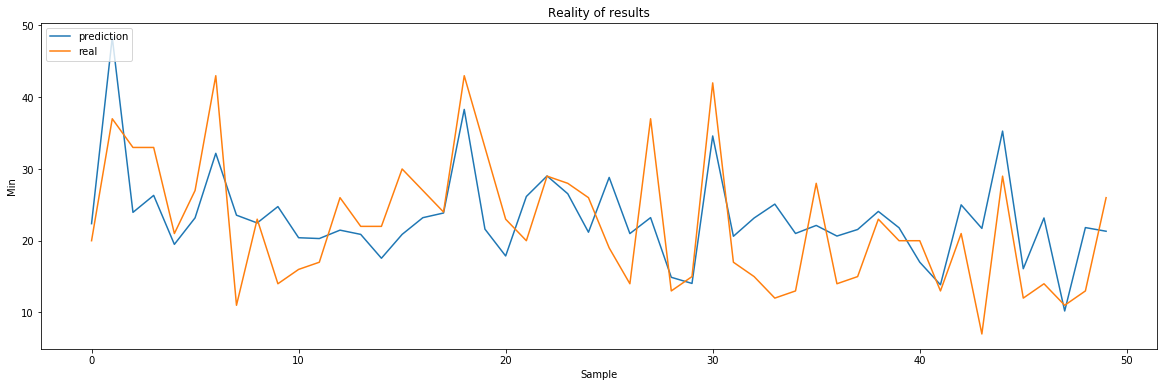

2


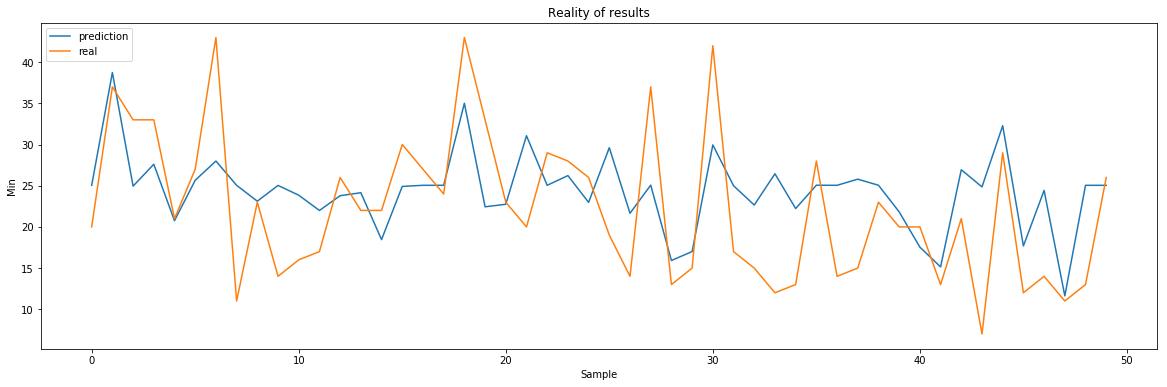

3


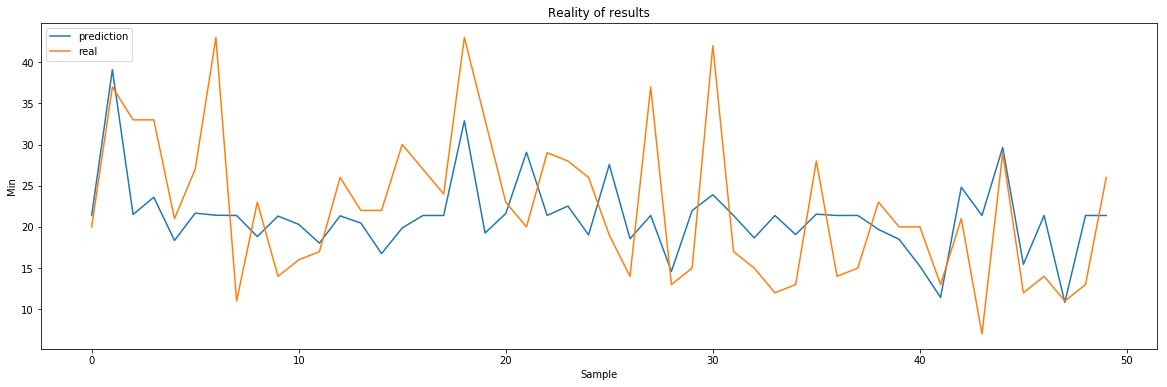

4


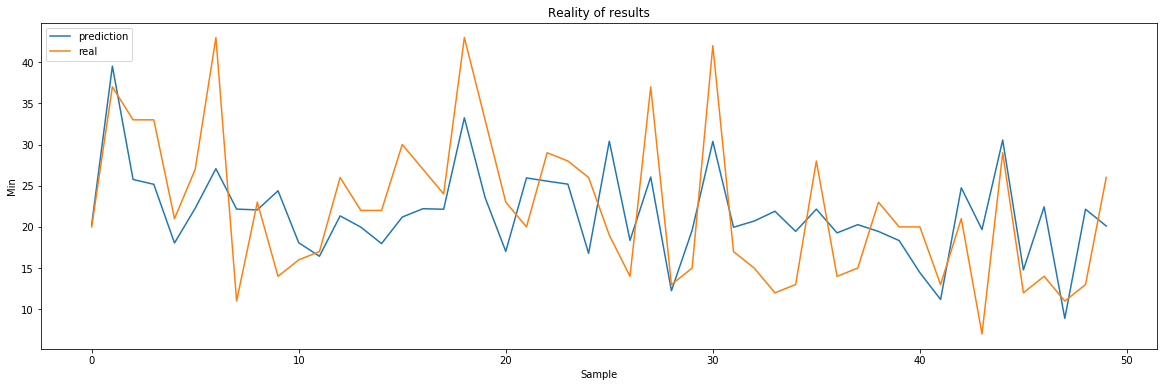

5


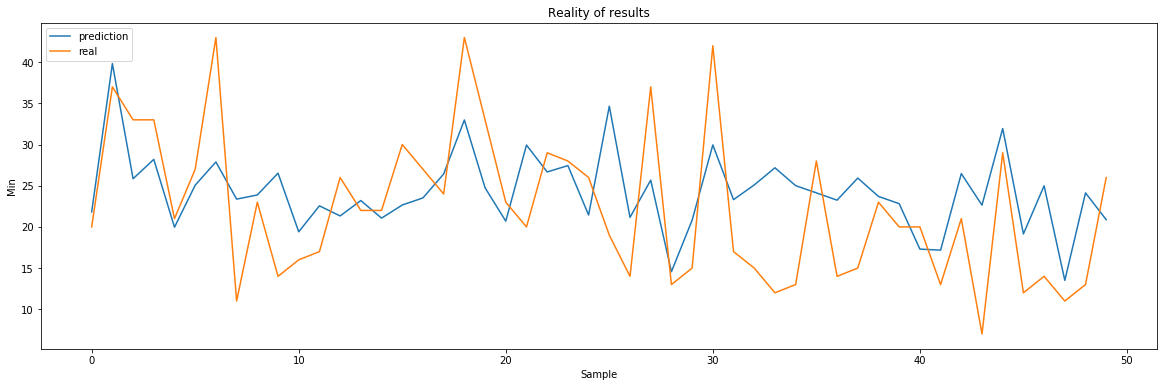

6


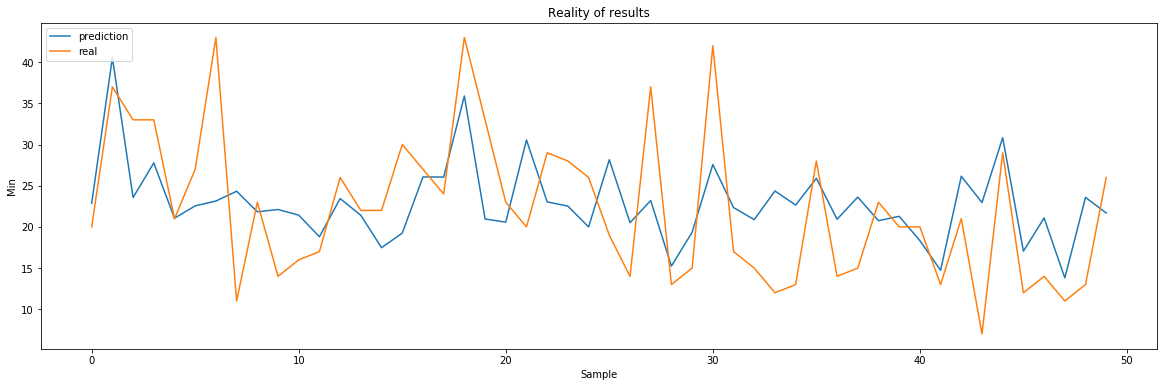

7


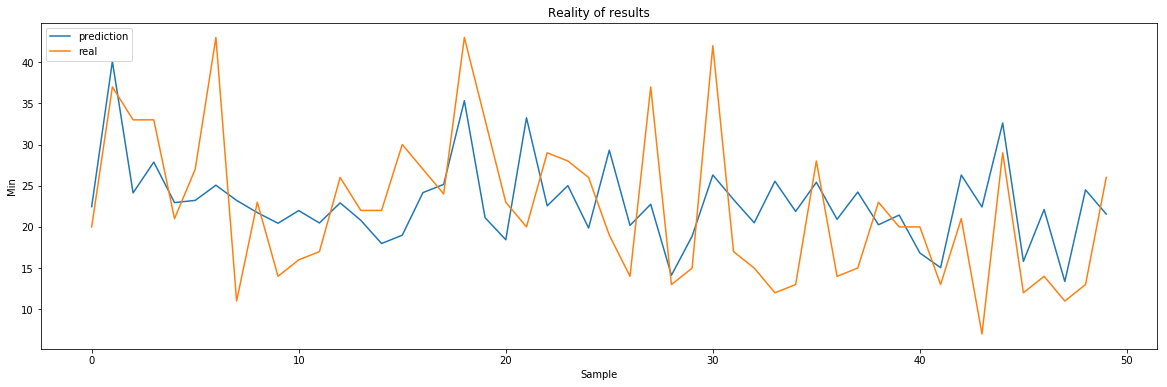

8


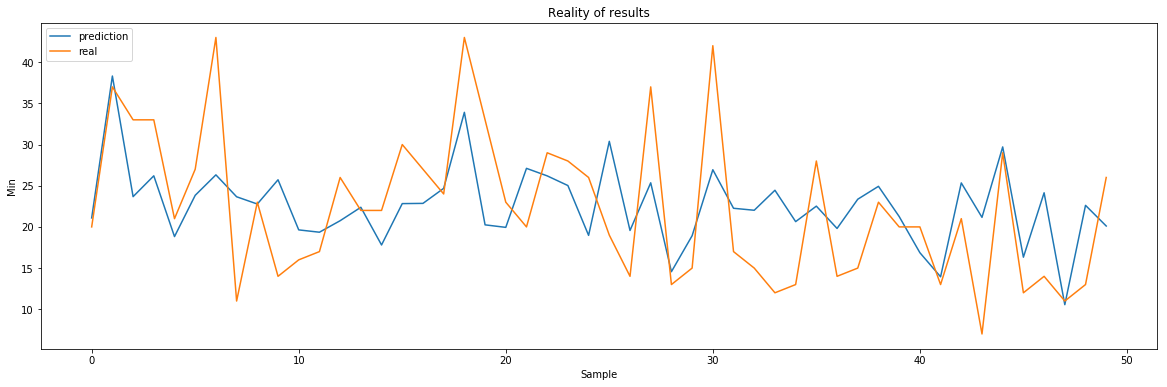

9


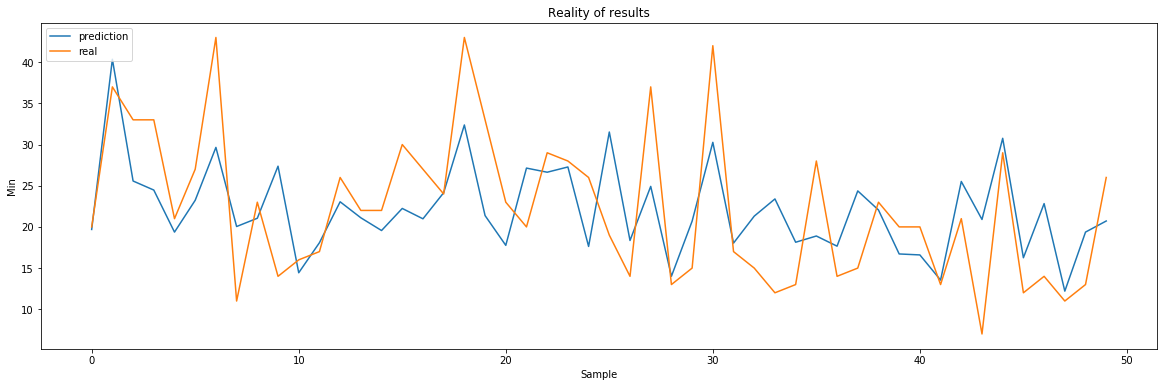

10


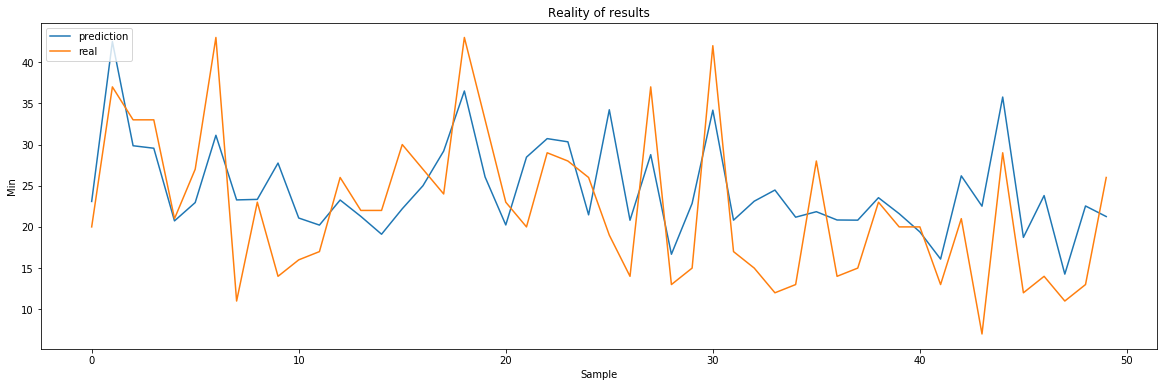

11


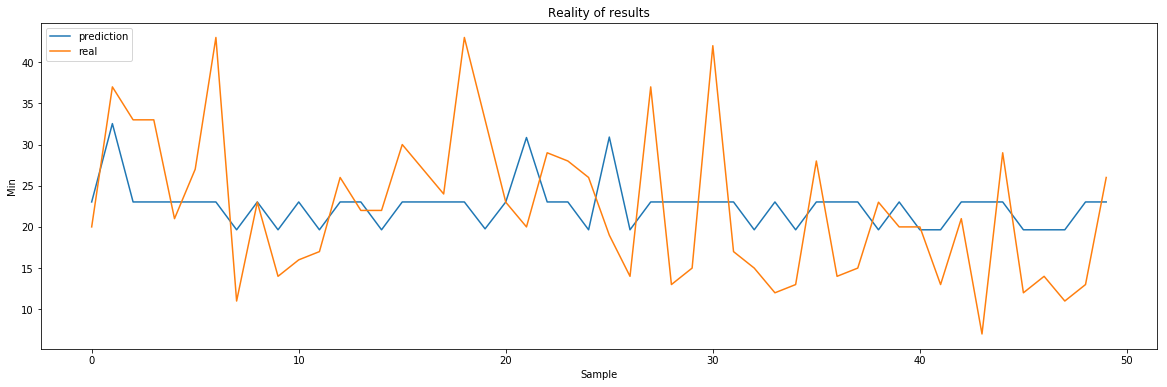

12


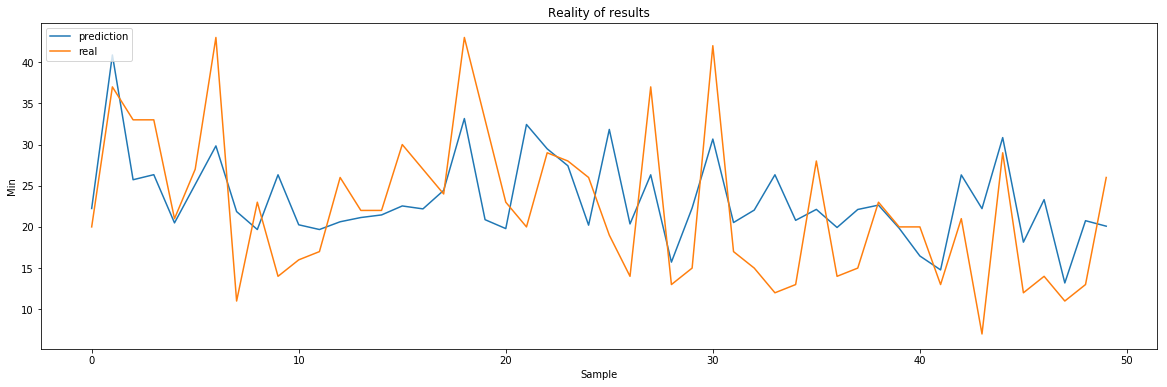

In [115]:
S=0
E=50
i=0
for m in [m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12 ]:
    i+=1
    print(i)
    
    plt.figure(figsize=(20,6))
    plt.plot(m.predict(X[S:E])*90)
    plt.plot(y[S:E]*90)
    plt.title('Reality of results')
    plt.ylabel('Min')
    plt.xlabel('Sample')
    plt.legend(['prediction', 'real'], loc='upper left')
    plt.show()

# Trees

In [0]:
def prepare_date_for_trees(df_date):
#     df_date = p['date']
    weekdays_series = df_date.map(lambda x: x.dayofweek)
    time_flat_series = df_date.map(lambda a: (a.hour-10)/10 + a.minute/600)
    date_for_trees = pd.concat([weekdays_series, time_flat_series], axis=1)
    date_for_trees.columns = ['weekday', 'time']
    return date_for_trees

def prepare_for_trees(df):
    date_df = prepare_date_for_trees(df['date'])
    y = p['pickup_time'].values
    df = df.drop(['date', 'pickup_time'], axis=1)
    return pd.concat([df, date_df], axis=1).values, y

In [0]:
X, y = prepare_for_trees(p)

In [0]:
def make(i, d, r, X, y):
    print(d,i,r)
    regr = CatBoostRegressor(iterations=i,
                          learning_rate=r,
                          depth=d, task_type='GPU')
    regr.fit(X, y)
    return regr
# regr_1 = DecisionTreeRegressor(max_depth=2)
# regr_2 = DecisionTreeRegressor(max_depth=5)
# regr_1.fit(X, y)
# regr_2.fit(X, y)

In [0]:
z0, z1 = 1, 30
yy=y[z0:z1]
winner = [30, 0, 0, 0]
results = []

ri = 10
rd = 4
rr = 33 #11

for i in range(1,ri):
    i*=50
    for d in range(1,rd):
        for r in range(1,rr):
            r *= 0.03
            pred = make(i, d, r, X, y).predict(X[z0:z1])
            mse = ((yy-pred)**2).mean()
            result = [mse,i,d,r]
            results.append(result)
            if mse<winner[0]:
                winner = result
            print("mse: {}, i: {}, d: {}, r: {}".format(mse, i, d, r))


print("winner!", winner)

# print("3-", make(3, X, y).predict(np.array([X[z]])))
# print("4-", make(4, X, y).predict(np.array([X[z]])))
# print("5-", make(5, X, y).predict(np.array([X[z]])))
# print("6-", make(6, X, y).predict(np.array([X[z]])))
# print("7-", make(7, X, y).predict(np.array([X[z]])))
# print("8-", make(8, X, y).predict(np.array([X[z]])))
# print("9-", make(9, X, y).predict(np.array([X[z]])))
# print("10-", make(10, X, y).predict(np.array([X[z]])))
# print("11-", make(11, X, y).predict(np.array([X[z]])))
# print("12-", make(12, X, y).predict(np.array([X[z]])))
# print("13-", make(13, X, y).predict(np.array([X[z]])))